![image](https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/notebooks/headers/AutoAI-Banner_Experiment-Notebook.png)
# Experiment Notebook - AutoAI Notebook v1.19.1


This notebook contains the steps and code to demonstrate support of AutoAI experiments in the Watson Machine Learning service. It introduces Python API commands for data retrieval, training experiments, persisting pipelines, testing pipelines, refining pipelines, and scoring the resulting model.

**Note:** Notebook code generated using AutoAI will execute successfully. If code is modified or reordered, there is no guarantee it will successfully execute. For details, see: <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/autoai-notebook.html">Saving an Auto AI experiment as a notebook</a>


Some familiarity with Python is helpful. This notebook uses Python 3.10 and the `ibm_watson_machine_learning` package.


## Notebook goals

The learning goals of this notebook are:
-  Defining an AutoAI experiment
-  Training AutoAI models 
-  Comparing trained models
-  Deploying the model as a web service
-  Scoring the model to generate predictions



## Contents

This notebook contains the following parts:

**[Setup](#setup)**<br>
&nbsp;&nbsp;[Package installation](#install)<br>
&nbsp;&nbsp;[Watson Machine Learning connection](#connection)<br>
**[Experiment configuration](#configuration)**<br>
&nbsp;&nbsp;[Experiment metadata](#metadata)<br>
**[Working with completed AutoAI experiment](#work)**<br>
&nbsp;&nbsp;[Get fitted AutoAI optimizer](#get)<br>
&nbsp;&nbsp;[Pipelines comparison](#comparison)<br>
&nbsp;&nbsp;[Get pipeline as a scikit-learn pipeline model](#get_pipeline)<br>
&nbsp;&nbsp;[Inspect pipeline](#inspect_pipeline)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[Visualize pipeline model](#visualize)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[Preview pipeline model as a Python code](#preview)<br>
**[Deploy and Score](#scoring)**<br>
&nbsp;&nbsp;[Working with spaces](#working_spaces)<br>
**[Running AutoAI experiment with Python API](#run)**<br>
**[Clean up](#cleanup)**<br>
**[Next steps](#next_steps)**<br>
**[Copyrights](#copyrights)**

<a id="setup"></a>
# Setup

<a id="install"></a>
## Package installation
Before you use the sample code in this notebook, install the following packages:
 - ibm-watson-machine-learning,
 - autoai-libs,
 - lale,
 - scikit-learn,
 - xgboost,
 - lightgbm,
 - snapml


In [1]:
!pip install ibm-watson-machine-learning | tail -n 1
!pip install autoai-libs==1.14.13 | tail -n 1
!pip install 'lale>=0.7,<0.8' | tail -n 1
!pip install scikit-learn==1.1.1 | tail -n 1
!pip install xgboost==1.6.2 | tail -n 1
!pip install lightgbm==3.3.2 | tail -n 1
!pip install 'snapml==1.8.12' | tail -n 1

<a id="configuration"></a>
# Experiment configuration

<a id="metadata"></a>
## Experiment metadata
This cell defines the metadata for the experiment, including: training_data_references, training_result_reference, experiment_metadata.

In [2]:
from ibm_watson_machine_learning.helpers import DataConnection
from ibm_watson_machine_learning.helpers import ContainerLocation

training_data_references = [
    DataConnection(
        data_asset_id='3feb5328-41e4-4b2c-8a32-60b4abee3509'
    ),
]
training_result_reference = DataConnection(
    location=ContainerLocation(
        path='auto_ml/a693ed0b-1436-4a86-9b32-4789fbaeae10/wml_data/a86fb369-c8d3-44b9-9836-43322e25e899/data/automl',
        model_location='auto_ml/a693ed0b-1436-4a86-9b32-4789fbaeae10/wml_data/a86fb369-c8d3-44b9-9836-43322e25e899/data/automl/model.zip',
        training_status='auto_ml/a693ed0b-1436-4a86-9b32-4789fbaeae10/wml_data/a86fb369-c8d3-44b9-9836-43322e25e899/training-status.json'
    )
)

In [3]:
experiment_metadata = dict(
    prediction_type='multiclass',
    prediction_column='quality',
    holdout_size=0.1,
    scoring='accuracy',
    csv_separator=',',
    random_state=33,
    max_number_of_estimators=4,
    training_data_references=training_data_references,
    training_result_reference=training_result_reference,
    deployment_url='https://us-south.ml.cloud.ibm.com',
    project_id='b80d7e3f-d28a-4417-9c62-8e2b70981bc4',
    drop_duplicates=True,
    include_batched_ensemble_estimators=[]
)

<a id="connection"></a>
## Watson Machine Learning connection

This cell defines the credentials required to work with the Watson Machine Learning service.

**Action**: Provide the IBM Cloud apikey, For details, see [documentation](https://cloud.ibm.com/docs/account?topic=account-userapikey).

In [4]:
api_key = 'INSERT API KEY'

In [5]:
wml_credentials = {
    "apikey": api_key,
    "url": experiment_metadata['deployment_url']
}

<a id="work"></a>


# Working with the completed AutoAI experiment

This cell imports the pipelines generated for the experiment. The best pipeline will be saved as a model.

<a id="get"></a>


## Get fitted AutoAI optimizer

In [6]:
from ibm_watson_machine_learning.experiment import AutoAI

pipeline_optimizer = AutoAI(wml_credentials, project_id=experiment_metadata['project_id']).runs.get_optimizer(metadata=experiment_metadata)

Use `get_params()` to retrieve configuration parameters.

In [7]:
pipeline_optimizer.get_params()

{'name': 'testautoai2',
 'desc': '',
 'prediction_type': 'classification',
 'prediction_column': 'quality',
 'prediction_columns': None,
 'timestamp_column_name': None,
 'scoring': 'accuracy',
 'holdout_size': 0.1,
 'max_num_daub_ensembles': 4,
 't_shirt_size': 'a6c4923b-b8e4-444c-9f43-8a7ec3020110',
 'train_sample_rows_test_size': None,
 'include_only_estimators': None,
 'include_batched_ensemble_estimators': None,
 'backtest_num': None,
 'lookback_window': None,
 'forecast_window': None,
 'backtest_gap_length': None,
 'cognito_transform_names': None,
 'data_join_graph': False,
 'csv_separator': ',',
 'excel_sheet': None,
 'encoding': 'utf-8',
 'positive_label': None,
 'drop_duplicates': True,
 'outliers_columns': None,
 'text_processing': None,
 'word2vec_feature_number': None,
 'daub_give_priority_to_runtime': None,
 'text_columns_names': None,
 'sampling_type': None,
 'sample_size_limit': None,
 'sample_rows_limit': None,
 'sample_percentage_limit': None,
 'number_of_batch_rows': N

<a id="comparison"></a>
## Pipelines comparison

Use the `summary()` method to list trained pipelines and evaluation metrics information in
the form of a Pandas DataFrame. You can use the DataFrame to compare all discovered pipelines and select the one you like for further testing.

In [8]:
summary = pipeline_optimizer.summary()
best_pipeline_name = list(summary.index)[0]
summary

,Enhancements,Estimator,training_accuracy_(optimized),training_precision_weighted,holdout_f1_weighted,holdout_f1_macro,holdout_recall_micro,training_precision_macro,training_recall_micro,training_precision_micro,...,training_recall_weighted,holdout_precision_macro,holdout_precision_weighted,holdout_recall_weighted,holdout_accuracy,holdout_f1_micro,training_f1_micro,holdout_precision_micro,training_recall_macro,training_f1_weighted
Pipeline Name,,,,,,,,,,,,,,,,,,,,,
Pipeline_1,,XGBClassifier,0.621577,0.604428,0.656955,0.440969,0.669565,0.353256,0.621577,0.621577,...,0.621577,0.493459,0.648515,0.669565,0.669565,0.669565,0.621577,0.669565,0.334830,0.611392
Pipeline_2,HPO,XGBClassifier,0.621577,0.604428,0.656955,0.440969,0.669565,0.353256,0.621577,0.621577,...,0.621577,0.493459,0.648515,0.669565,0.669565,0.669565,0.621577,0.669565,0.334830,0.611392
Pipeline_3,"HPO, FE",XGBClassifier,0.631335,0.616637,0.656922,0.443598,0.669565,0.402179,0.631335,0.631335,...,0.631335,0.499829,0.649534,0.669565,0.669565,0.669565,0.631335,0.669565,0.342039,0.620829
Pipeline_4,"HPO, FE, HPO",XGBClassifier,0.631335,0.616637,0.656922,0.443598,0.669565,0.402179,0.631335,0.631335,...,0.631335,0.499829,0.649534,0.669565,0.669565,0.669565,0.631335,0.669565,0.342039,0.620829
Pipeline_12,"HPO, FE, HPO",LGBMClassifier,0.625467,0.610409,0.645953,0.330154,0.660870,0.389247,0.625467,0.625467,...,0.625467,0.328070,0.635001,0.660870,0.660870,0.660870,0.625467,0.660870,0.331858,0.613392
Pipeline_9,,LGBMClassifier,0.606997,0.594965,0.632220,0.336159,0.643478,0.332429,0.606997,0.606997,...,0.606997,0.339220,0.622992,0.643478,0.643478,0.643478,0.606997,0.643478,0.326239,0.599509
Pipeline_11,"HPO, FE",LGBMClassifier,0.623534,0.608805,0.620996,0.435303,0.626087,0.336962,0.623534,0.623534,...,0.623534,0.491339,0.621170,0.626087,0.626087,0.626087,0.623534,0.626087,0.333774,0.613999
Pipeline_7,"HPO, FE",ExtraTreesClassifier,0.618655,0.612173,0.599556,0.302260,0.608696,0.338333,0.618655,0.618655,...,0.618655,0.293709,0.591890,0.608696,0.608696,0.608696,0.618655,0.608696,0.340020,0.612876
Pipeline_8,"HPO, FE, HPO",ExtraTreesClassifier,0.618655,0.612173,0.599556,0.302260,0.608696,0.338333,0.618655,0.618655,...,0.618655,0.293709,0.591890,0.608696,0.608696,0.608696,0.618655,0.608696,0.340020,0.612876


<a id="get_pipeline"></a>
### Get pipeline as a scikit-learn pipeline model

After you compare the pipelines, download and save a scikit-learn pipeline model object from the
AutoAI training job.

**Tip:** To get a specific pipeline, pass the pipeline name in:
```
pipeline_optimizer.get_pipeline(pipeline_name=pipeline_name)
```

In [9]:
pipeline_model = pipeline_optimizer.get_pipeline(pipeline_name=best_pipeline_name)

Next, check the importance of features for selected pipeline.

In [10]:
pipeline_optimizer.get_pipeline_details()['features_importance']

,features_importance
alcohol,1.00
sulphates,0.46
volatile acidity,0.31
total sulfur dioxide,0.18
free sulfur dioxide,0.15
fixed acidity,0.14
pH,0.08
density,0.05
residual sugar,0.04
citric acid,0.02


**Tip:** If you want to check all the details of the model evaluation metrics, use:
```
pipeline_optimizer.get_pipeline_details()
```

<a id="inspect_pipeline"></a>
## Inspect pipeline

<a id="visualize"></a>
### Visualize pipeline model

Preview pipeline model stages as a graph. Each node's name links to a detailed description of the stage.


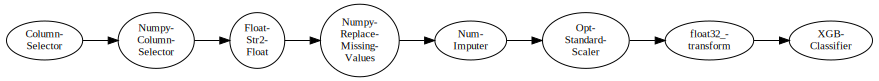

In [11]:
pipeline_model.visualize()

<a id="preview"></a>
### Preview pipeline model as a Python code
In the next cell, you can preview the saved pipeline model as a Python code.  
You can review the exact steps used to create the model.

**Note:** If you want to get sklearn representation, add the following parameter to the `pretty_print` call: `astype='sklearn'`.

In [12]:
pipeline_model.pretty_print(combinators=False, ipython_display=True)

```python
from autoai_libs.transformers.exportable import ColumnSelector
from autoai_libs.transformers.exportable import NumpyColumnSelector
from autoai_libs.transformers.exportable import FloatStr2Float
from autoai_libs.transformers.exportable import NumpyReplaceMissingValues
from autoai_libs.transformers.exportable import NumImputer
from autoai_libs.transformers.exportable import OptStandardScaler
from autoai_libs.transformers.exportable import float32_transform
from xgboost import XGBClassifier
from lale.operators import make_pipeline

column_selector = ColumnSelector(
    columns_indices_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
)
numpy_column_selector = NumpyColumnSelector(
    columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
)
float_str2_float = FloatStr2Float(
    dtypes_list=[
        "float_num", "float_num", "float_num", "float_num", "float_num",
        "float_num", "float_num", "float_num", "float_num", "float_num",
        "float_num",
    ],
    missing_values_reference_list=[],
)
numpy_replace_missing_values = NumpyReplaceMissingValues(
    missing_values=[], filling_values=float("nan")
)
num_imputer = NumImputer(missing_values=float("nan"), strategy="median")
opt_standard_scaler = OptStandardScaler(use_scaler_flag=False)
xgb_classifier = XGBClassifier(
    objective="multi:softprob",
    base_score=0.5,
    booster="gbtree",
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0,
    gpu_id=-1,
    grow_policy="depthwise",
    interaction_constraints="",
    learning_rate=0.300000012,
    max_bin=256,
    max_cat_to_onehot=4,
    max_delta_step=0,
    max_depth=3,
    max_leaves=0,
    min_child_weight=1,
    missing=float("nan"),
    monotone_constraints="()",
    n_jobs=2,
    num_parallel_tree=1,
    predictor="auto",
    random_state=33,
    reg_alpha=0,
    reg_lambda=1,
    sampling_method="uniform",
    subsample=1,
    tree_method="hist",
    validate_parameters=1,
    verbosity=0,
    nthread=2,
    silent=True,
    seed=33,
)
pipeline = make_pipeline(
    column_selector,
    numpy_column_selector,
    float_str2_float,
    numpy_replace_missing_values,
    num_imputer,
    opt_standard_scaler,
    float32_transform(),
    xgb_classifier,
)
```

### Calling the `predict` method
If you want to get a prediction by using the pipeline model object, call `pipeline_model.predict()`.

**Note:** If you want to work with a pure sklearn model:
 - add the following parameter to the `get_pipeline` call: `astype='sklearn'`,
 - or `scikit_learn_pipeline = pipeline_model.export_to_sklearn_pipeline()`

<a id="scoring"></a>
## Deploy and Score

In this section you will learn how to deploy and score the model as a web service.

<a id="working_spaces"></a>
### Working with spaces

In this section you will specify a deployment space to organize assets and then deploy and score the model. If you do not have an existing space, you can use the [Deployment Spaces Dashboard](https://dataplatform.cloud.ibm.com/ml-runtime/spaces?context=cpdaas) to create a new space. Follow these steps:

- Click **New Deployment Space**
- Create an empty space
- Select Cloud Object Storage
- Select Watson Machine Learning instance and press **Create**
- Copy `space_id` and paste it below

**Tip**: You can also use the API to prepare the space for your work. Learn more [here](https://github.com/IBM/watson-machine-learning-samples/blob/master/cloud/notebooks/python_sdk/instance-management/Space%20management.ipynb).

**Action**: Assign or update space ID below.

### Deployment creation

In [13]:
target_space_id = "INSERT TARGET SPACE ID"

from ibm_watson_machine_learning.deployment import WebService

service = WebService(
    source_wml_credentials=wml_credentials,
    target_wml_credentials=wml_credentials,
    source_project_id=experiment_metadata['project_id'],
    target_space_id=target_space_id
)
service.create(
    model=best_pipeline_name,
    metadata=experiment_metadata,
    deployment_name='Best_pipeline_webservice'
)

Preparing an AutoAI Deployment...
Published model uid: c7f9cd0d-ab95-4900-98d3-940b6d2b5160
Deploying model c7f9cd0d-ab95-4900-98d3-940b6d2b5160 using V4 client.


#######################################################################################

Synchronous deployment creation for uid: 'c7f9cd0d-ab95-4900-98d3-940b6d2b5160' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
..
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='7b98af75-d8b2-4e22-b5ac-7189c1529d6a'
------------------------------------------------------------------------------------------------




Use the `print` method for the deployment object to show basic information about the service: 

In [14]:
print(service)

name: Best_pipeline_webservice, id: 7b98af75-d8b2-4e22-b5ac-7189c1529d6a, scoring_url: https://us-south.ml.cloud.ibm.com/ml/v4/deployments/7b98af75-d8b2-4e22-b5ac-7189c1529d6a/predictions, asset_id: c7f9cd0d-ab95-4900-98d3-940b6d2b5160


To show all available information about the deployment, use the `.get_params()` method.

In [15]:
service.get_params()

Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.


{'entity': {'asset': {'id': 'c7f9cd0d-ab95-4900-98d3-940b6d2b5160'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hybrid_pipeline_hardware_specs': [{'hardware_spec': {'name': 'S',
     'num_nodes': 1},
    'node_runtime_id': 'auto_ai.kb'}],
  'name': 'Best_pipeline_webservice',
  'online': {},
  'space_id': '126c347c-1637-4289-90fb-95532d6dd2f3',
  'status': {'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/7b98af75-d8b2-4e22-b5ac-7189c1529d6a/predictions'},
   'serving_urls': ['https://us-south.ml.cloud.ibm.com/ml/v4/deployments/7b98af75-d8b2-4e22-b5ac-7189c1529d6a/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2023-06-29T15:02:10.665Z',
  'id': '7b98af75-d8b2-4e22-b5ac-7189c1529d6a',
  'modified_at': '2023-06-29T15:02:10.665Z',
  'name': 'Best_pipeline_webservice',
  'owner': 'IBMid-665003DUMT',
  'space_id': '126c347c-1637-4289-90fb-95532d6dd2f3'},
 'system': {'warnings': [{'id': 'Deprecated',
    'message': 'online_url is deprec

### Scoring of webservice
You can make a scoring request by calling `score()` on the deployed pipeline.

If you want to work with the web service in an external Python application, follow these steps to retrieve the service object:

 - Initialize the service by `service = WebService(target_wml_credentials=wml_credentials,target_space_id=experiment_metadata['space_id'])`
 - Get deployment_id: `service.list()`
 - Get webservice object: `service.get('deployment_id')`

After that you can call `service.score(score_records_df)` method. The `score()` method accepts `pandas.DataFrame` objects. 

<a id="cleanup"></a>
### Deleting deployment
You can delete the existing deployment by calling the `service.delete()` command.
To list the existing web services, use the `service.list()` method.

<a id="run"></a>

## Running the AutoAI experiment with Python API

If you want to run the AutoAI experiment using the Python API, follow these steps. The experiment settings were generated basing on parameters set in the AutoAI UI.


```
from ibm_watson_machine_learning.experiment import AutoAI

experiment = AutoAI(wml_credentials, project_id=experiment_metadata['project_id'])
```

```
OPTIMIZER_NAME = 'custom_name'
```

```
from ibm_watson_machine_learning.helpers import DataConnection
from ibm_watson_machine_learning.helpers import ContainerLocation

training_data_references = [
    DataConnection(
        data_asset_id='3feb5328-41e4-4b2c-8a32-60b4abee3509'
    ),
]
training_result_reference = DataConnection(
    location=ContainerLocation(
        path='auto_ml/a693ed0b-1436-4a86-9b32-4789fbaeae10/wml_data/a86fb369-c8d3-44b9-9836-43322e25e899/data/automl',
        model_location='auto_ml/a693ed0b-1436-4a86-9b32-4789fbaeae10/wml_data/a86fb369-c8d3-44b9-9836-43322e25e899/data/automl/model.zip',
        training_status='auto_ml/a693ed0b-1436-4a86-9b32-4789fbaeae10/wml_data/a86fb369-c8d3-44b9-9836-43322e25e899/training-status.json'
    )
)
```

The new pipeline optimizer will be created and training will be triggered.

```
pipeline_optimizer = experiment.optimizer(
    name=OPTIMIZER_NAME,
    prediction_type=experiment_metadata['prediction_type'],
    prediction_column=experiment_metadata['prediction_column'],
    scoring=experiment_metadata['scoring'],
    holdout_size=experiment_metadata['holdout_size'],
    csv_separator=experiment_metadata['csv_separator'],
    drop_duplicates=experiment_metadata['drop_duplicates'],
    include_batched_ensemble_estimators=experiment_metadata['include_batched_ensemble_estimators'],
)
```

```
pipeline_optimizer.fit(
    training_data_references=training_data_references,
    training_results_reference=training_result_reference,
)
```


<a id="next_steps"></a>
# Next steps
You successfully completed this notebook!
You learned how to use ibm-watson-machine-learning to run and explore AutoAI experiments.
Check out the official [AutoAI site](https://www.ibm.com/cloud/watson-studio/autoai) for more samples, tutorials, documentation, how-tos, and blog posts.

<a id="copyrights"></a>
### Copyrights

Licensed Materials - Copyright © 2023 IBM. This notebook and its source code are released under the terms of the ILAN License.
Use, duplication disclosure restricted by GSA ADP Schedule Contract with IBM Corp.

**Note:** The auto-generated notebooks are subject to the International License Agreement for Non-Warranted Programs (or equivalent) and License Information document for Watson Studio Auto-generated Notebook (License Terms), such agreements located in the link below. Specifically, the Source Components and Sample Materials clause included in the License Information document for Watson Studio Auto-generated Notebook applies to the auto-generated notebooks.  

By downloading, copying, accessing, or otherwise using the materials, you agree to the <a href="http://www14.software.ibm.com/cgi-bin/weblap/lap.pl?li_formnum=L-AMCU-BYC7LF">License Terms</a>  

___